In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['font.size'] = 25

## CloudSeg

In [12]:
import matplotlib.pyplot as plt
import pymongo
import numpy as np

db = pymongo.MongoClient("mongodb://localhost:27017/")["Jan3_cloudseg_reconstruction_loss"]["stats"]

backprops = []
for sec in range(61):
    backprops.append(sorted(list(db.find({
        'input': "videos/dashcam/dashcam_126/part%d.mp4",
    'approach': 'Backprop',
    'second': sec
    })), key = lambda x: x['timestamp'])[-1])
backprops = sorted(backprops, key = lambda x: x['second'])



db = pymongo.MongoClient("mongodb://localhost:27017/")["Jan1_cloudseg"]["stats"]



cloudsegs = list(db.find({
    'input': "videos/dashcam/dashcam_126/part%d.mp4",
    'approach': 'CloudSeg'
}))
cloudsegs = sorted(cloudsegs, key = lambda x: x['second'])


# fig, ax = plt.subplots(figsize=(10, 7))
# ax.plot([i for i in range(61)], [i['f1'] for i in backprops], label='Backprop')
# ax.plot([i for i in range(61)], [i['f1'] for i in cloudsegs], label='CloudSeg')
# ax.set_xlabel('Time (1/3 second)')
# ax.set_ylabel('F1 score')
# ax.legend()
    

0.9185433338900082
0.9196883527958979


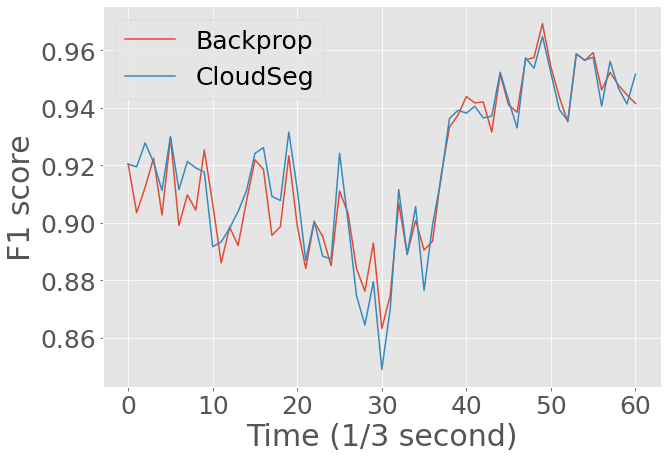

In [14]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot([i for i in range(61)], [i['f1'] for i in backprops], label='Backprop')
ax.plot([i for i in range(61)], [i['f1'] for i in cloudsegs], label='CloudSeg')
print(np.mean([i['f1'] for i in backprops]))
print(np.mean([i['f1'] for i in cloudsegs]))
ax.set_xlabel('Time (1/3 second)')
ax.set_ylabel('F1 score')
ax.legend()

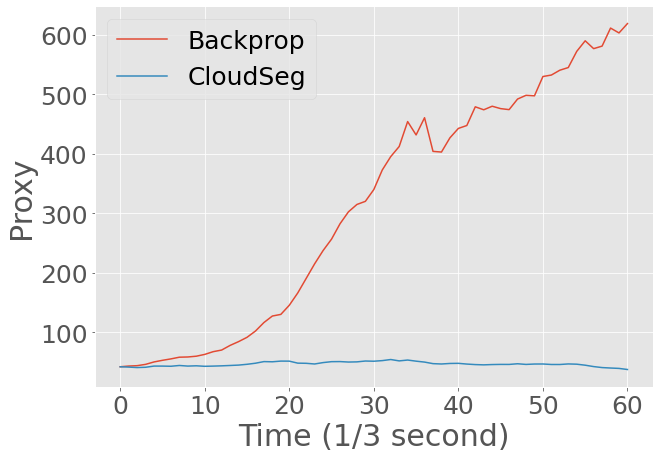

In [18]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot([i for i in range(61)], [i['mean_sum_score'] for i in backprops], label='Backprop')
ax.plot([i for i in range(61)], [i['mean_sum_score'] for i in cloudsegs], label='CloudSeg')
ax.set_xlabel('Time (1/3 second)')
ax.set_ylabel('Proxy')
ax.legend()

Text(0, 0.5, 'Number of objects')

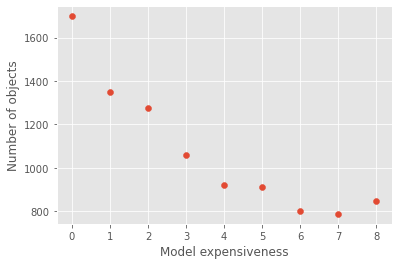

In [40]:
import matplotlib.pyplot as plt
import pymongo
import numpy as np

db = pymongo.MongoClient("mongodb://localhost:27017/")["Jan1_cloudseg"]["stats"]

f1s = []
scores = []
nobjs = []

for idx in range(9):
    config = {
        'app': 'EfficientDet-d%d' % idx,
        'input': "videos/dashcam/dashcam_126/part%d.mp4",
    }

    result = list(db.find(config))
    
    avg_f1 = np.mean([i['f1'] for i in result])
    avg_score = np.mean([i['mean_sum_score'] for i in result])
    avg_nobj = np.mean([i['tp'] + i['fp'] for i in result])
    
    # print(avg_score)
    
    
    f1s.append(avg_f1)
    scores.append(avg_score)
    nobjs.append(avg_nobj)
    
    
plt.scatter(range(9), nobjs)
plt.xlabel('Model expensiveness')
plt.ylabel('Number of objects')
    
    

66.23414192825068
53.18856355010486
48.51033520307697
40.734845208340005
31.71178780227411
29.958511446343092
27.84177917730613
25.509949199488904
27.04534743262119


Text(0, 0.5, 'F1 score')

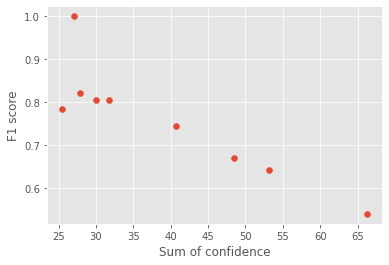

In [38]:
import matplotlib.pyplot as plt
import pymongo
import numpy as np

db = pymongo.MongoClient("mongodb://localhost:27017/")["diff_EfficientDet"]["stats"]

f1s = []
scores = []

for idx in range(9):
    config = {
        'app': 'EfficientDet-d%d' % idx,
        'input': "videos/dashcam/dashcam_126/part%d.mp4",
    }

    result = list(db.find(config))
    
    avg_f1 = np.mean([i['f1'] for i in result])
    avg_score = np.mean([i['mean_count_score'] for i in result])
    
    print(avg_score)
    
    
    f1s.append(avg_f1)
    scores.append(avg_score)
    
    
plt.scatter(scores, f1s)
plt.xlabel('Sum of confidence')
plt.ylabel('F1 score')
    
    

61
63.559084220010725
61
64.50764840548156
61
65.18682648705655
61
65.65768739043689
61
65.98086879292472
122
66.23414192825068
61
66.42845547785524
61
66.60576973586787
61
66.77796279406938
61
66.90352274159916
62
66.89246737572455
61
67.0601125623359
61
67.07699703779377
61
67.05001806040279
61
66.99604697305648


Text(0, 0.5, '# of objects')

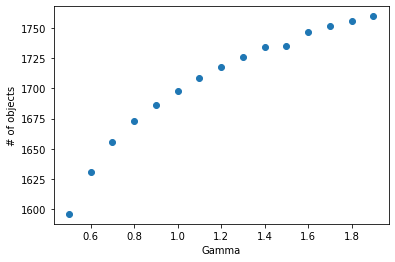

In [1]:
import matplotlib.pyplot as plt
import pymongo
import numpy as np

# db = pymongo.MongoClient("mongodb://localhost:27017/")["diff_gamma"]["stats"]
db = pymongo.MongoClient("mongodb://localhost:27017/")["diff_gamma_new"]["stats"]

f1s = []
scores = []

gammas = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]

for gamma in gammas:
    config = {
        # 'app': 'EfficientDet-d%d' % idx,
        'input': "videos/dashcam/dashcam_126/part%d.mp4",
        "gamma": gamma,
    }

    result = list(db.find(config))
    print(len(result))
    
    avg_f1 = np.mean([i['tp'] + i['fp'] for i in result])
    avg_score = np.mean([i['mean_sum_score'] for i in result])
    
    print(avg_score)
    
    
    f1s.append(avg_f1)
    scores.append(avg_score)
    
    
plt.scatter(gammas, f1s)
plt.xlabel('Gamma')
plt.ylabel('# of objects')
    
    

## Nov19 visualize reducto result

61
0.25666518405568406
61
0.5370992757990712
61
0.6956431709352087
61
0.8202736612226142
61
0.8409729438727019
61
0.867429075671024


Text(0, 0.5, 'F1 score')

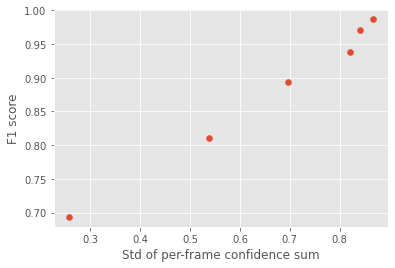

In [3]:
import matplotlib.pyplot as plt
import pymongo
import numpy as np

plt.style.use('ggplot')

# db = pymongo.MongoClient("mongodb://localhost:27017/")["diff_gamma"]["stats"]
db = pymongo.MongoClient("mongodb://localhost:27017/")["Nov19_reducto"]["stats"]

f1s = []
scores = []

values = [0.4,0.35, 0.3, 0.25, 0.2, 0.15]

for val in values:
    config = {
        # 'app': 'EfficientDet-d%d' % idx,
        'input': "videos/dashcam/dashcam_126/part%d.mp4",
        "reducto": {'pixel': val},
    }

    result = list(db.find(config))
    print(len(result))
    
    avg_f1 = np.mean([i['f1'] for i in result])
    avg_score = np.mean([i['std_sum_score'] for i in result])
    
    print(avg_score)
    
    
    f1s.append(avg_f1)
    scores.append(avg_score)
    
    
plt.scatter(scores, f1s)
plt.xlabel('Std of per-frame confidence sum')
plt.ylabel('F1 score')
    
 

61
0.7672760518359356
61
0.7352142339480705
61
0.6893335934423033
61
0.6658785315688516
61
0.59320813655609
61
0.7869577969683975
61
0.7683049879269674
61
0.7196115840810396
61
0.7120249877611298
61
0.6656462433309004
61
0.8121220225193462
61
0.814536272990899
61
0.7796725557475793
61
0.7797246047707854
61
0.7287345176837483
61
0.7875798117430484
61
0.8002105746112886
61
0.7467075999154419
61
0.7380648927121866
61
0.7132949264811688
61
0.8100545650775559
61
0.8042573684704353
61
0.8000081294048272
61
0.7959636708904729
61
0.8009016633674991
61
0.8342920710317424
61
0.8306205419243359
61
0.7986094814832093
61
0.8095411907454007
61
0.7750529629773781
61
0.8342920710317424
61
0.8306205419243359
61
0.7986094814832093
61
0.8095411907454007
61
0.7750529629773781
61
0.8342920710317424
61
0.8306205419243359
61
0.7986094814832093
61
0.8095411907454007
61
0.7750529629773781
61
0.8342920710317424
61
0.8306205419243359
61
0.7986094814832093
61
0.8095411907454007
61
0.7881235306868788
61
0.84283073

Text(0, 0.5, 'F1 score')

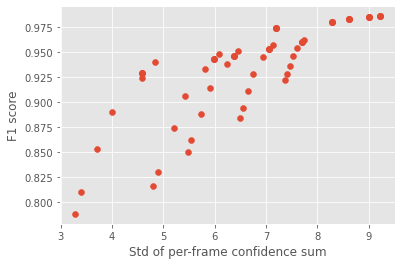

In [6]:
import matplotlib.pyplot as plt
import pymongo
import numpy as np

plt.style.use('ggplot')

# db = pymongo.MongoClient("mongodb://localhost:27017/")["diff_gamma"]["stats"]
db = pymongo.MongoClient("mongodb://localhost:27017/")["Nov29_reducto"]["stats"]

f1s = []
scores = []
frames = []

values = [0.4,0.35, 0.3, 0.25, 0.2, 0.15]

for pixel_thresh in [0.4, 0.3, 0.2]:
    for area_thresh in [0.3, 0.2, 0.15, 0.1, 0.05]:
        for edge_thresh in [0.0075, 0.008, 0.0085, 0.009, 0.01]:
            config = {
                # 'app': 'EfficientDet-d%d' % idx,
                'input': "videos/dashcam/dashcam_126/part%d.mp4",
                "reducto": {'pixel': pixel_thresh, 'area': area_thresh, 'edge': edge_thresh},
            }

            result = list(db.find(config))
            print(len(result))
            
            avg_f1 = np.mean([i['f1'] for i in result])
            avg_score = np.mean([i['std_sum_score'] for i in result])
            avg_frame = np.mean([i['remaining_frames'] for i in result])
            
            print(avg_score)
            
            
            f1s.append(avg_f1)
            scores.append(avg_score)
            frames.append(avg_frame)
    
    
plt.scatter(frames, f1s)
plt.xlabel('Std of per-frame confidence sum')
plt.ylabel('F1 score')
    
 

61
0.7269037346799374
61
0.7033757363361304
61
0.6592808040998087
61
0.6358544838503607
61
0.5515787165683413
61
0.7353761442381208
61
0.7274240901190722
61
0.6849905774925018
61
0.7009165003081805
61
0.6405226748999313
61
0.7660375632299958
61
0.7857654103442152
61
0.7407933704223432
61
0.7522059399723198
61
0.6862161181551722
61
0.7261383848159113
61
0.7552921756606429
61
0.6796842868490246
61
0.6758044206971028
61
0.6444026568413976
61
0.7731940352334096
61
0.7795307343705029
61
0.7775936574374159
61
0.7773785712083495
61
0.787661943732679
61
0.7956553523647253
61
0.8002510978060019
61
0.7489517629283202
61
0.7804884867540973
61
0.736175430323723
61
0.7956553523647253
61
0.8002510978060019
61
0.7489517629283202
61
0.7804884867540973
61
0.736175430323723
61
0.7956553523647253
61
0.8002510978060019
61
0.7489517629283202
61
0.7804884867540973
61
0.736175430323723
61
0.7956553523647253
61
0.8002510978060019
61
0.7489517629283202
61
0.7804884867540973
61
0.7480645064568188
61
0.805335400

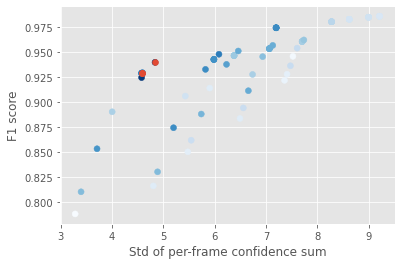

In [33]:
import matplotlib.pyplot as plt
import pymongo
import numpy as np

plt.style.use('ggplot')

# db = pymongo.MongoClient("mongodb://localhost:27017/")["diff_gamma"]["stats"]
db = pymongo.MongoClient("mongodb://localhost:27017/")["Nov29_reducto"]["stats"]

f1s = []
scores = []
frames = []

values = [0.4,0.35, 0.3, 0.25, 0.2, 0.15]

for pixel_thresh in [0.4, 0.3, 0.2]:
    for area_thresh in [0.3, 0.2, 0.15, 0.1, 0.05]:
        for edge_thresh in [0.0075, 0.008, 0.0085, 0.009, 0.01]:
            config = {
                # 'app': 'EfficientDet-d%d' % idx,
                'input': "videos/dashcam/dashcam_126/part%d.mp4",
                "reducto": {'pixel': pixel_thresh, 'area': area_thresh, 'edge': edge_thresh},
            }

            result = list(db.find(config))
            print(len(result))
            
            avg_f1 = np.mean([i['f1'] for i in result])
            avg_score = np.mean([(i['std_sum_score'] ** 2)  for i in result])
            avg_frame = np.mean([i['remaining_frames'] for i in result])
            
            print(avg_score)
            
            
            f1s.append(avg_f1)
            scores.append(avg_score)
            frames.append(avg_frame)


# edge thresh = 0.01
# area thresh = doesn't matter
# pixel_thresh = 0.3
    
    
plt.scatter(frames, f1s, c = [i - 0.4 * 0.1 * j for (i, j) in zip(scores, frames)], cmap='Blues')
plt.xlabel('Std of per-frame confidence sum')
plt.ylabel('F1 score')

f1s = []
scores = []
frames = []
for pixel_thresh in [0.3]:
    for area_thresh in [0.3, 0.2, 0.15, 0.1, 0.05]:
        for edge_thresh in [ 0.01]:
            config = {
                # 'app': 'EfficientDet-d%d' % idx,
                'input': "videos/dashcam/dashcam_126/part%d.mp4",
                "reducto": {'pixel': pixel_thresh, 'area': area_thresh, 'edge': edge_thresh},
            }

            result = list(db.find(config))
            print(len(result))
            
            avg_f1 = np.mean([i['f1'] for i in result])
            avg_score = np.mean([(i['std_sum_score'] ** 2)  for i in result])
            avg_frame = np.mean([i['remaining_frames'] for i in result])
            
            print(avg_score)
            
            
            f1s.append(avg_f1)
            scores.append(avg_score)
            frames.append(avg_frame)
plt.scatter(frames, f1s)
    
 